In [12]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [4]:
import json

with open('../malaria_data/training.json') as f:
    data = json.load(f)

In [5]:
# create empty dictionary with column names as keys
cells_df = {
    'path':[],
    'min_r':[],
    'min_c':[],
    'max_r':[],
    'max_c':[],
    'r_len':[],
    'c_len':[],
    'category':[]
}

# run a first for loop to get each image from list
for image in data:
    
#     run a nested loop withing each image to get the individual object data

    #Populate cells_df dict with bounding box data
    for box in image['objects']:
        cells_df['path'].append(image['image']['pathname'])
        cells_df['min_r'].append(box['bounding_box']['minimum']['r'])
        cells_df['min_c'].append(box['bounding_box']['minimum']['c'])
        cells_df['max_r'].append(box['bounding_box']['maximum']['r'])
        cells_df['max_c'].append(box['bounding_box']['maximum']['c'])
        cells_df['r_len'].append(box['bounding_box']['maximum']['r']-box['bounding_box']['minimum']['r'])
        cells_df['c_len'].append(box['bounding_box']['maximum']['c']-box['bounding_box']['minimum']['c'])
        cells_df['category'].append(box['category'])

# create dataframe using pandas  

training_json_df = pd.DataFrame(cells_df)
print(training_json_df)


                                                   path  min_r  min_c  max_r  \
0      /images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png   1057   1440   1158   
1      /images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png    868   1303    971   
2      /images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png    578    900    689   
3      /images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png    304    611    408   
4      /images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png    198    881    312   
...                                                 ...    ...    ...    ...   
80108  /images/99e979d4-ee97-4d7f-9da6-00bead40db4d.png    757    520    873   
80109  /images/99e979d4-ee97-4d7f-9da6-00bead40db4d.png    308    808    406   
80110  /images/99e979d4-ee97-4d7f-9da6-00bead40db4d.png    510    453    595   
80111  /images/99e979d4-ee97-4d7f-9da6-00bead40db4d.png      0   1260     87   
80112  /images/99e979d4-ee97-4d7f-9da6-00bead40db4d.png    740      0    852   

       max_c  r_len  c_len        categ

In [8]:
# Size analysis

training_json_df['box_area'] = training_json_df['c_len']*training_json_df['r_len']
training_json_df['rect_ratio'] = training_json_df['c_len']/training_json_df['r_len']

training_json_df.head()

,path,min_r,min_c,max_r,max_c,r_len,c_len,category,box area,box_area,rect_ratio
0,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,1057,1440,1158,1540,101,100,red blood cell,10100,10100,0.990099
1,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,868,1303,971,1403,103,100,red blood cell,10300,10300,0.970874
2,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,578,900,689,1008,111,108,red blood cell,11988,11988,0.972973
3,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,304,611,408,713,104,102,red blood cell,10608,10608,0.980769
4,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,198,881,312,1003,114,122,red blood cell,13908,13908,1.070175


In [10]:
training_json_df.describe()

,min_r,min_c,max_r,max_c,r_len,c_len,box area,box_area,rect_ratio
count,80113.000000,80113.000000,80113.000000,80113.000000,80113.000000,80113.000000,80113.000000,80113.000000,80113.000000
mean,544.956412,745.531075,653.112416,854.426772,108.156005,108.895697,11881.209716,11881.209716,1.018884
std,317.907257,432.921602,317.935921,432.967210,15.729066,15.660231,2919.680426,2919.680426,0.160322
min,0.000000,0.000000,60.000000,69.000000,53.000000,54.000000,3933.000000,3933.000000,0.290323
25%,270.000000,369.000000,378.000000,479.000000,98.000000,99.000000,9800.000000,9800.000000,0.932203
50%,545.000000,745.000000,653.000000,854.000000,107.000000,108.000000,11655.000000,11655.000000,1.008475
75%,820.000000,1120.000000,927.000000,1229.000000,118.000000,118.000000,13685.000000,13685.000000,1.088235
max,1129.000000,1531.000000,1200.000000,1600.000000,255.000000,250.000000,52020.000000,52020.000000,3.230769


<Axes: xlabel='box_area', ylabel='Count'>

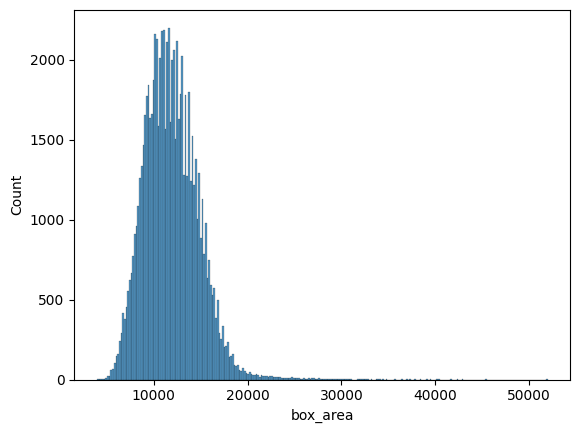

In [13]:
sns.histplot(data=training_json_df, x='box_area')

<Axes: xlabel='rect_ratio', ylabel='Count'>

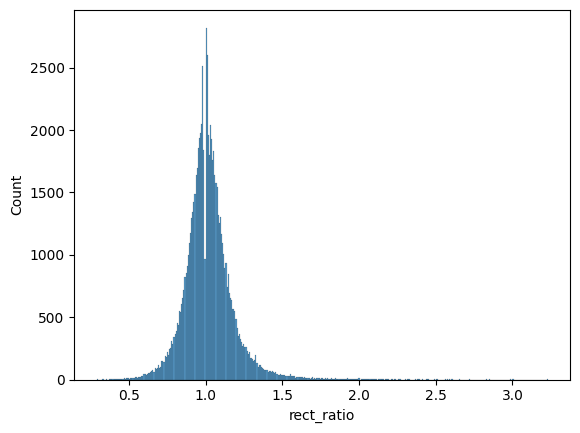

In [14]:
sns.histplot(data=training_json_df, x='rect_ratio')